Compare hindcasts to Jie's runs to Evaluate Hindcasts

In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.io as sio


from salishsea_tools import teos_tools, geo_tools

%matplotlib inline

In [2]:
# Locations of files analyzed
paths = {'nowcast': '/data/jieliu/MEOPAR/river-treatment/oct8_10nowcast/',
        'deepenresult': '/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/',
        'reduced_viscosity': '/data/jieliu/MEOPAR/river-treatment/oct8_10reduceviscosity/',
         'all_reduced': '/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/',
#        'real_nowcast': '/results/SalishSea/nowcast/early-days/4-10oct14/',
        'hindcast': '/results/SalishSea/hindcast/',
        'hindjetty': '/ocean/sallen/allen/research/MEOPAR/myResults/hindjetty/'
        }
salinity = {}

In [3]:
# Time and Locations: Note time corresponds to the Jie's base ferry crossing 
time = 5
imin = 380
icut = 430
imax = 500
jmin = 200
jcut = 280
jmax = 350

In [4]:
# mask all on the shallowest bathymetry: Note that this doesn't work particularly well for the Jetty bathymetry
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
tmask = 1-mesh_mask['tmask'][:]
mesh_mask.close()

In [5]:
# get the ferry line
grid = nc.Dataset(
        '/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathy_db1_jetty.nc',
        'r')
bathy = grid.variables['Bathymetry'][:, :]
X = grid.variables['nav_lon'][:, :]
Y = grid.variables['nav_lat'][:, :]
grid.close()

slats = np.linspace(49, 49.2, num=50, endpoint=True)
slons = np.linspace(-123.1,-123.8, num=50, endpoint=True)
ylat = np.zeros((50), dtype=np.int64)
xlon = np.zeros((50), dtype=np.int64)
for i, lat in enumerate(slats):
        lon = slons[i]
        ylat[i], xlon[i] = geo_tools.find_closest_model_point(lon, lat, X, Y)

In [6]:
# Read in salinity
for path in paths:
    if path == 'hindjetty':
        filename = paths[path]+'29sep14/SalishSea_1h_20140929_20141008_grid_T_20141008-20141008.nc'
    else:
        filename = paths[path]+'08oct14/SalishSea_1h_20141008_20141008_grid_T.nc'
    print (filename)
    dataset = nc.Dataset(filename)
    deptht = dataset.variables['deptht'][:]

    if path == 'hindcast' or path == 'hindjetty':
        salinity[path] = np.ma.array(dataset.variables['vosaline'][time], mask=tmask)
    else:
        salinity[path] = np.ma.array(teos_tools.psu_teos(dataset.variables['vosaline'][time]), mask=tmask)
    dataset.close()

/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/08oct14/SalishSea_1h_20141008_20141008_grid_T.nc
/results/SalishSea/hindcast/08oct14/SalishSea_1h_20141008_20141008_grid_T.nc
/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/08oct14/SalishSea_1h_20141008_20141008_grid_T.nc
/data/jieliu/MEOPAR/river-treatment/oct8_10reduceviscosity/08oct14/SalishSea_1h_20141008_20141008_grid_T.nc
/data/jieliu/MEOPAR/river-treatment/oct8_10nowcast/08oct14/SalishSea_1h_20141008_20141008_grid_T.nc
/ocean/sallen/allen/research/MEOPAR/myResults/hindjetty/29sep14/SalishSea_1h_20140929_20141008_grid_T_20141008-20141008.nc


deepenresult 22.5749
hindcast 22.2958
all_reduced 22.5095
reduced_viscosity 22.5961
nowcast 22.8024
hindjetty 22.2439


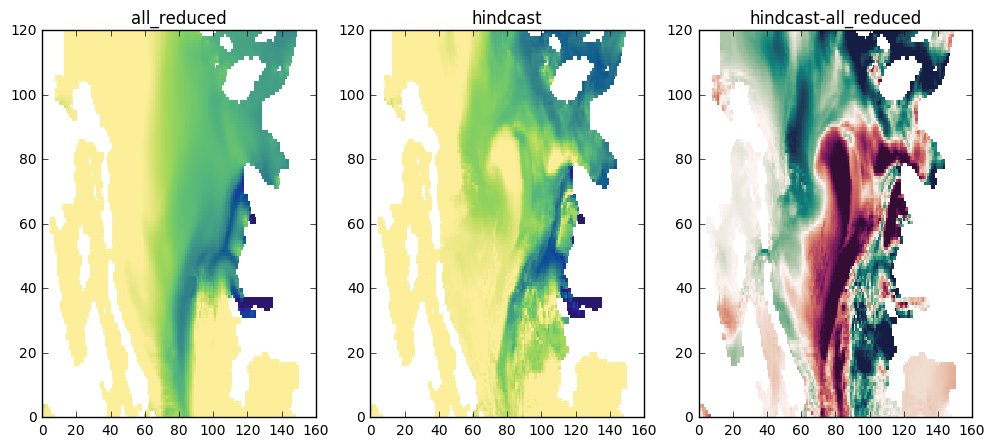

In [7]:
# Locate regions of interest and print the average 1.5 m salinity
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].pcolormesh(salinity['all_reduced'][1, imin:imax, jmin:jmax], cmap=cm.haline, vmin=5, vmax=25)
ax[0].set_title('all_reduced')
ax[1].pcolormesh(salinity['hindcast'][1, imin:imax, jmin:jmax], cmap=cm.haline, vmin=5, vmax=25)
ax[1].set_title('hindcast')
ax[2].pcolormesh(salinity['hindcast'][1, imin:imax, jmin:jmax]-salinity['all_reduced'][1, imin:imax, jmin:jmax], 
                 cmap=cm.curl, vmin=-5, vmax=5)
ax[2].set_title('hindcast-all_reduced')
for path in paths:
    print (path, np.nanmean(salinity[path][1, imin:imax, jmin:jmax]))

### Full Region Synopsis ###
The Hindcast run has more northward flow and is pixelated to the south.  It is fresher off Tswassen and to the north and saltier in the centre of the region.  Over this large region, it is fresher than Jie's runs

deepenresult 19.2322692871
hindcast 20.1508114463
all_reduced 19.09306737
reduced_viscosity 19.2701094778
nowcast 20.4579853259
hindjetty 21.1165321752


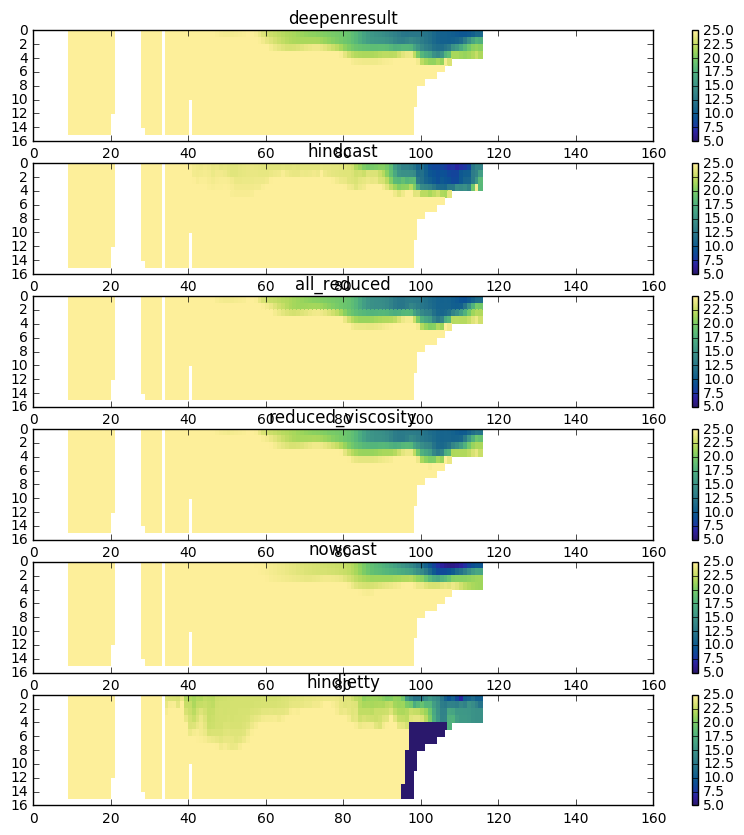

In [15]:
fig, axs = plt.subplots(6, 1, figsize=(10,10))
for path, ax in zip(paths, axs):
    mesh = ax.pcolormesh(salinity[path][0:15, icut, jmin:jmax], 
                         cmap=cm.haline, vmin=5, vmax=25)
    ax.invert_yaxis()
    ax.set_title(path)
    fig.colorbar(mesh, ax=ax)
    print (path, np.mean(salinity[path][1, icut, jmin+40:jmax-10]))

### Across the Region Centre ###

The freshwater in the hindcast is deeper against the mainland coast and spreads less into the central strait.  The tongue returning to the west is more clear in the Jetty case but occurs in both (see plan view above). Across this cut, the hindcast is definitely saltier at 1.5 m than Jie's runs.

deepenresult 19.324987793
hindcast 21.9217529297
all_reduced 18.6463338216
reduced_viscosity 18.9111368815
nowcast 21.3788777669
hindjetty 22.4579243978


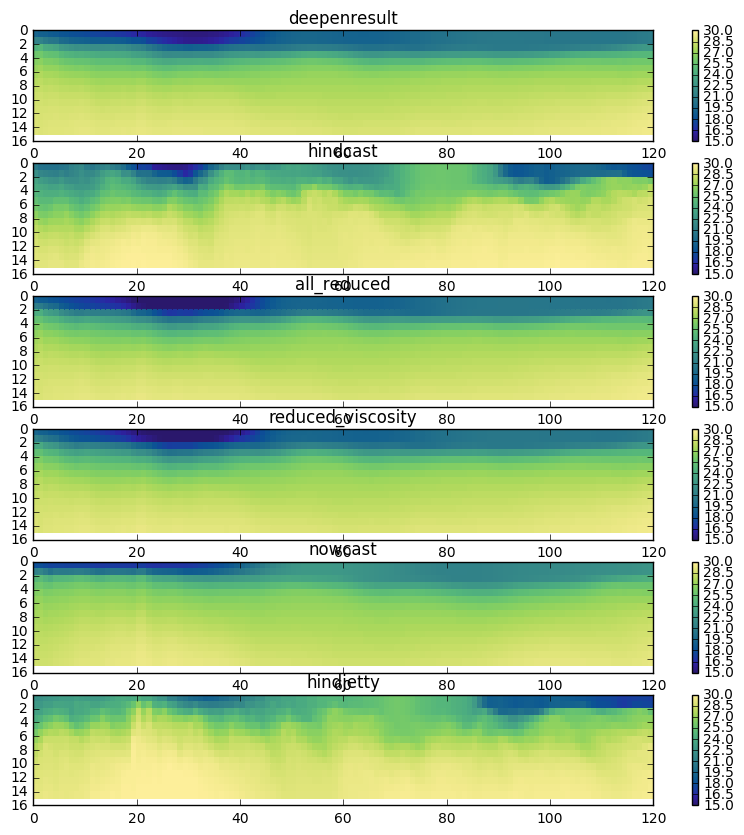

In [16]:
fig, axs = plt.subplots(6, 1, figsize=(10,10))
for path, ax in zip(paths, axs):
    mesh = ax.pcolormesh(salinity[path][0:15, imin:imax, jcut], 
                         cmap=cm.haline, vmin=15, vmax=30)
    ax.invert_yaxis()
    ax.set_title(path)
    fig.colorbar(mesh, ax=ax)
    print (path, np.mean(salinity[path][1, imin:imax, jcut]))

### Along the Regions Centre ###
Along the region centre we see even more strongly the saltiness of the hindcast.  Fresher to the north (right side) but much smaller region of freshwater to the south and much reduced freshwater in the central region.

In [10]:
saline = sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141007.mat')
lono = saline['ferryData']['data'][0, 0]['Longitude'][0, 0]
salo = teos_tools.psu_teos(saline['ferryData']['data'][0, 0]['Practical_Salinity'][0 ,0])

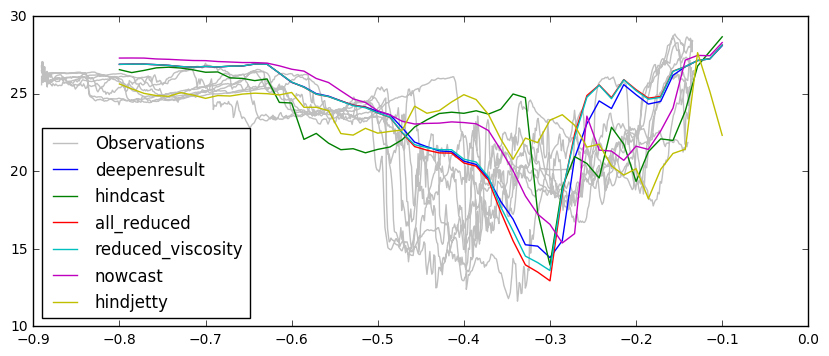

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(lono+123, salo, label='Observations', color='0.75')
for path in paths:
    ax.plot(slons+123, salinity[path][1, ylat, xlon], label=path);
ax.legend(loc='lower left');

### Along the Ferry Line ###
The tongue of freshwater captured here for hindcast is fleeting (not there at 3 hr UTC).

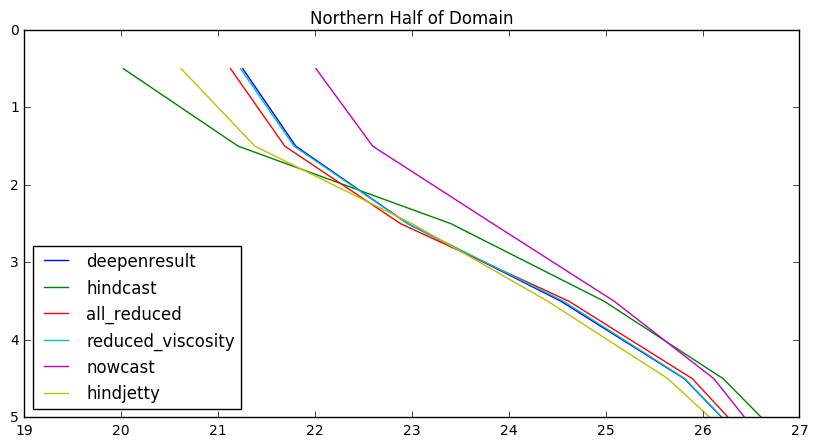

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for path in paths:
    ax.plot(np.nanmean(np.nanmean(salinity[path][:, icut:imax, jmin:jmax], axis=2), axis=1), 
            deptht, label=path)
ax.legend(loc='lower left')
ax.set_ylim(0, 5)
ax.invert_yaxis()
ax.set_xlim(19, 27)
ax.set_title("Northern Half of Domain")

### Northern Half of Domain ###
Here we see the freshest water in the surface of the hindcast and no evidence to too much mixing.

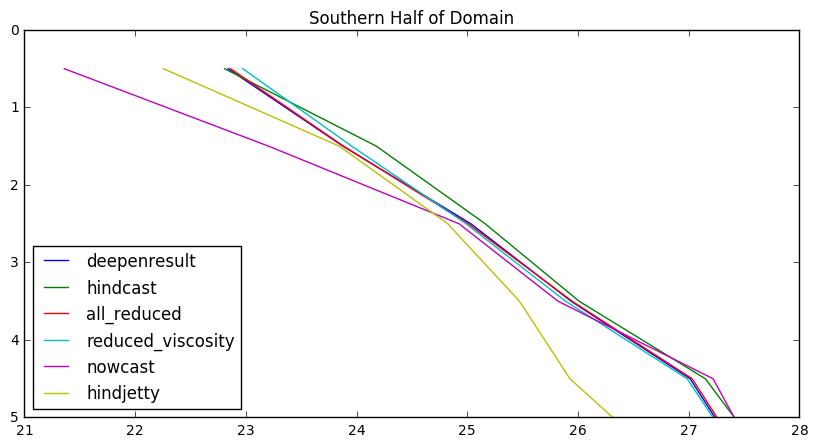

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for path in paths:
    ax.plot(np.nanmean(np.nanmean(salinity[path][:, imin:icut, jmin:jmax], axis=2), axis=1), 
            deptht, label=path)
ax.legend(loc='lower left')
ax.set_ylim(0, 5)
ax.invert_yaxis()
ax.set_xlim(21, 28)
ax.set_title("Southern Half of Domain")

### Southern Half of Domain ###
Here we see the salty hindcast.  No evidence of enhanced mixing, just generally salty.  The hindjetty is contaminated due to the poor masking.

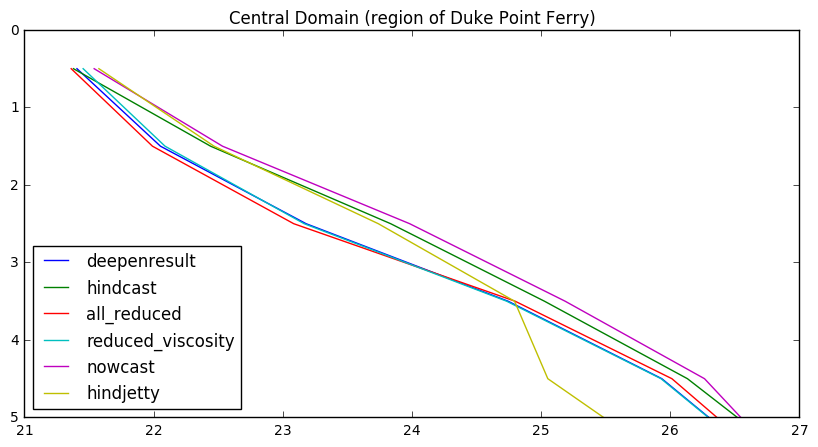

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for path in paths:
    ax.plot(np.nanmean(np.nanmean(salinity[path][:, imin+20:imax-20, jmin+30:jmax-40], axis=2), axis=1), 
            deptht, label=path)
ax.legend(loc='lower left')
ax.set_ylim(0, 5)
ax.invert_yaxis()
ax.set_xlim(21, 27)
ax.set_title("Central Domain (region of Duke Point Ferry)")

### Central Domain ###
Here we clearly see that although the surface is fresh for the hindcast result, the freshwater does not continue as deeply as for Jie's runs.